In [ ]:
#39.How would you create a basic Flask route that displays "Hello, World!" on the homepage?
from flask import Flask

app = Flask(__name__)

@app.route('/home')
def hello():
    return "Hello world!"

if __name__ == '__main__':
    app.run(debug = True)

In [ ]:
#40.Explain how to set up a Flask application to handle form submissions using POST requests.
'''Setting up a Flask application to handle form submissions using POST requests involves several steps. Here’s a detailed guide on how to achieve this:

1. Set Up Flask Environment
First, make sure you have Flask installed. You can install it using pip:
pip install Flask

2. Create the Flask Application
Create a new directory for your Flask application and navigate into it. Inside this directory, create a Python file, e.g., app.py.

3. 3. Create the HTML Form
Create a directory named templates inside your project directory. Inside the templates directory, create an HTML file, e.g., form.html. This file will contain the HTML form.


<!-- templates/form.html -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Form Submission</title>
</head>
<body>
    <form action="/submit" method="post">
        <label for="name">Name:</label>
        <input type="text" id="name" name="name">
        <label for="email">Email:</label>
        <input type="email" id="email" name="email">
        <button type="submit">Submit</button>
    </form>
</body>
</html>


4. Create the Flask Application
In your app.py file, set up the Flask application to handle the form submission.'''
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('form.html')

@app.route('/submit', methods=['POST'])
def submit():
    name = request.form.get('name')
    email = request.form.get('email')

    # Process the form data (e.g., save it to a database, send an email, etc.)
    # For now, just print it to the console
    print(f"Name: {name}, Email: {email}")

    return f"Form submitted successfully! Name: {name}, Email: {email}"

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
#41.Write a Flask route that accepts a parameter in the URL and displays it on the page.
from flask import Flask, request , render_template ,redirect

app = Flask(__name__)

@app.route('/home')
def home():
    return render_template('index.html')

@app.route('/disp', methods=['POST'])                       #use this html code to navigate
def search():                                               #<form action="http://127.0.0.1:5000//disp" method="post">
    # Access form data using request.form
    firstName = request.form.get('firstName')                #to jump the disp url
    lastName = request.form.get('lastName')
    email = request.form.get('email')
    age = request.form.get('age')

    p  = f"Name: {firstName} {lastName}<br>Email: {email}<br>Age: {age}"
    return p

if __name__ == '__main__':
    app.run(debug=True)

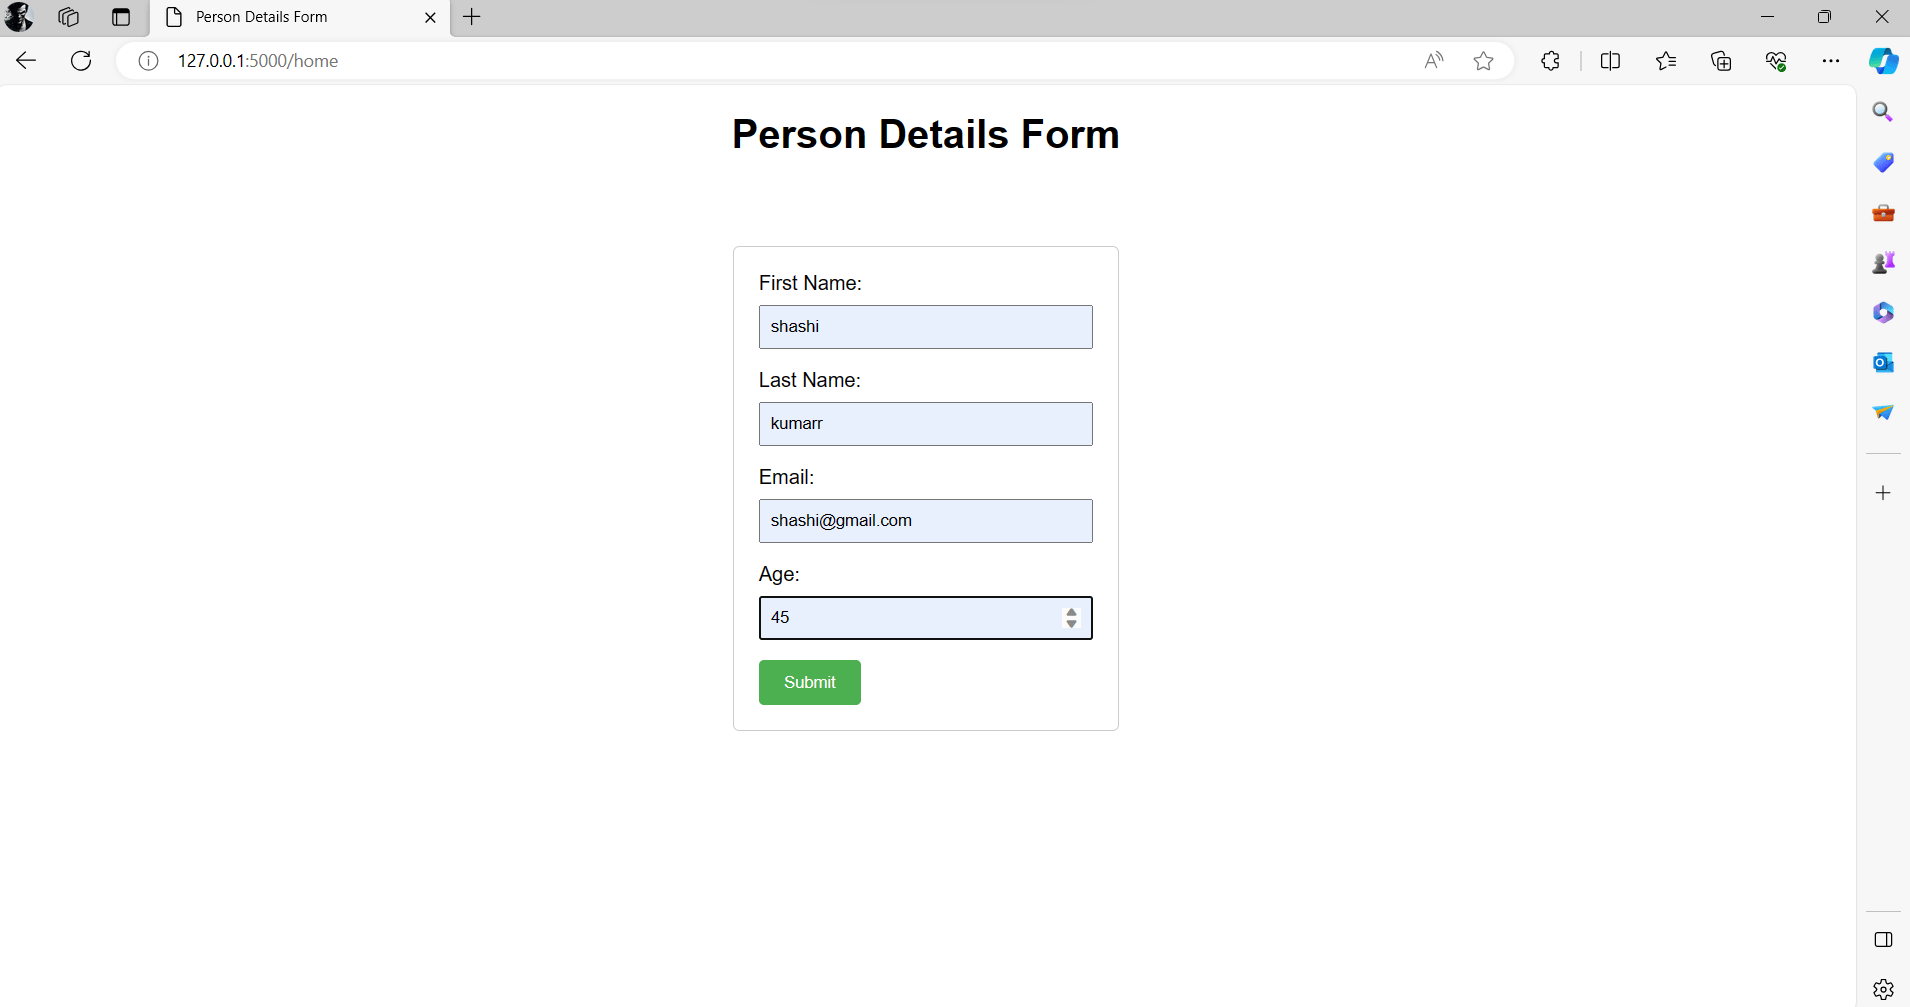

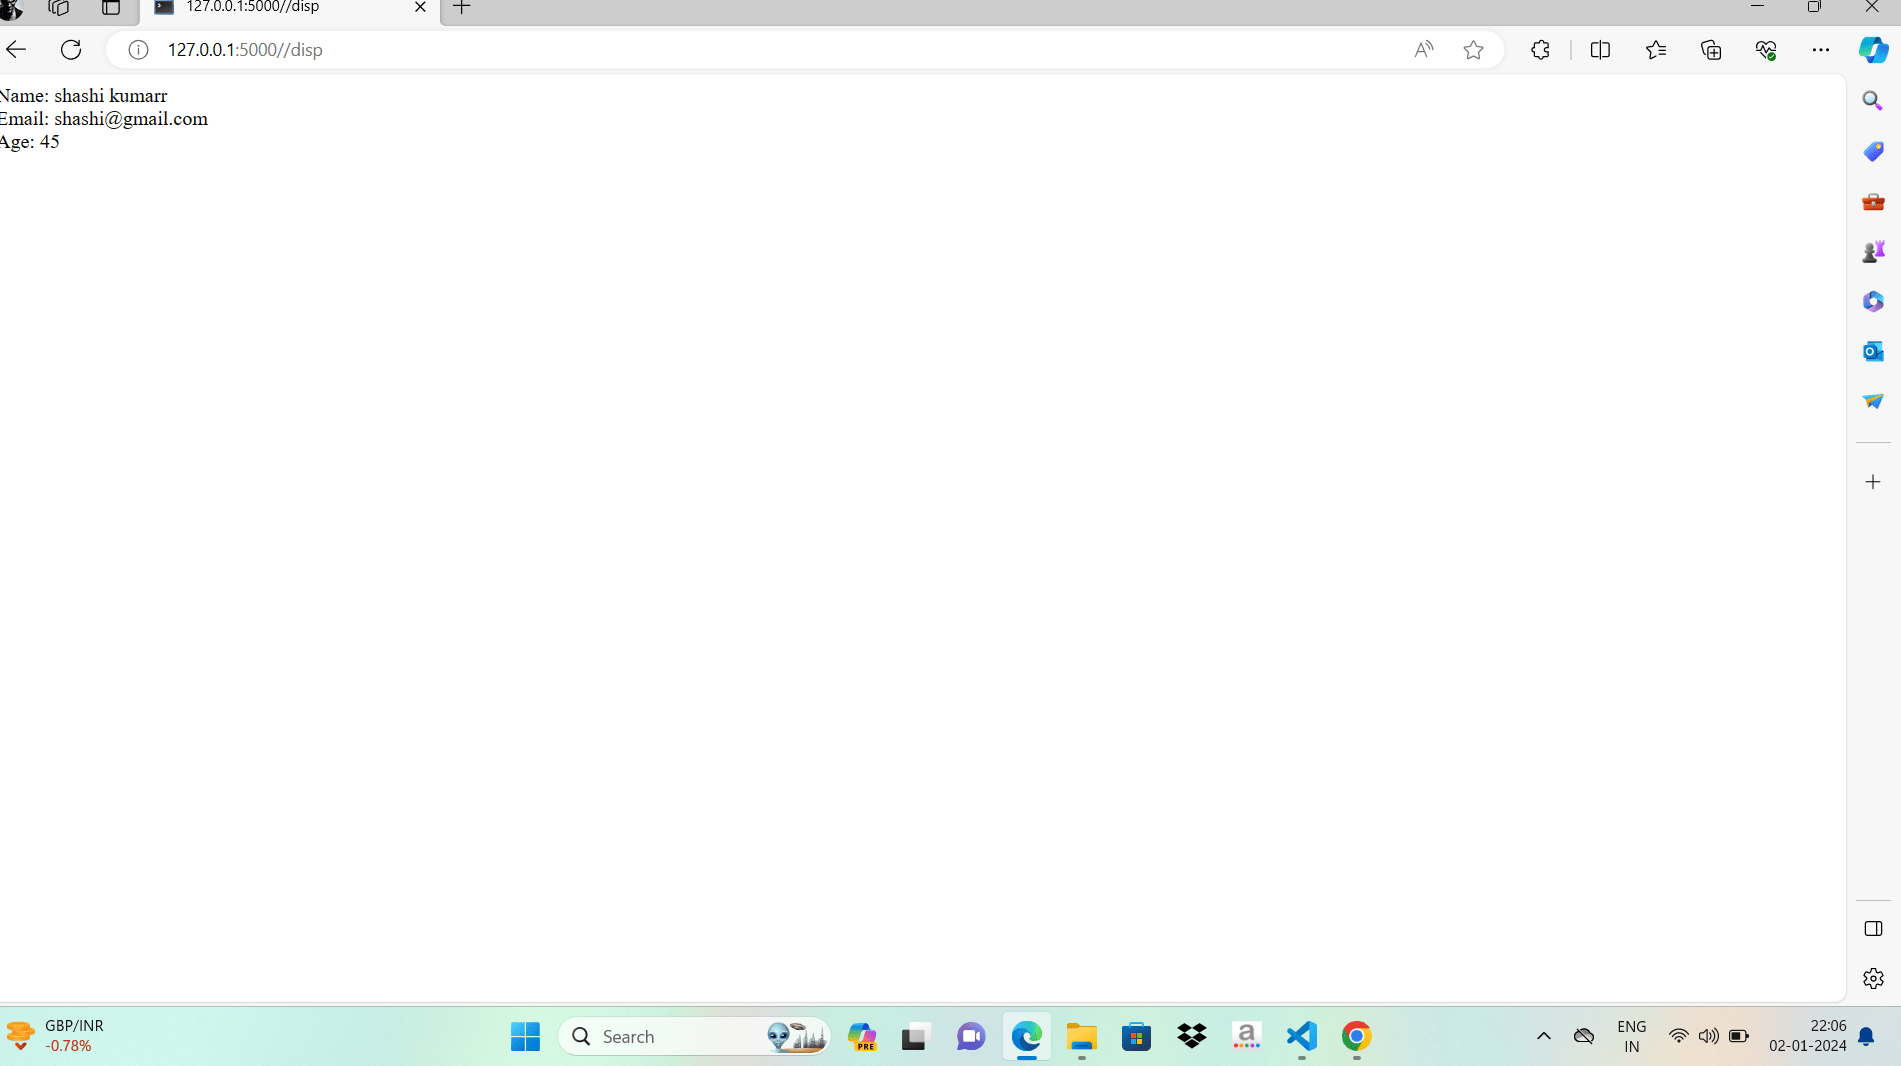

In [ ]:
#42.How can you implement user authentication in a Flask application?
from flask import Flask, render_template, request, g ,session                #g stand or global object to store data for lifetime of a request
import sqlite3

app = Flask(__name__)
app.secret_key = 'qwerty'
app.config['DATABASE'] = 'user.db'

def get_db():    #get_db() is a function that is responsible for getting the SQLite database connection within the context of a request
    db = getattr(g, '_database', None)              #getattr(g, '_database', None): This line attempts to get the value of the attribute
    if db is None:                                        #named _database from the g object. The getattr function is used here.
        db = g._database = sqlite3.connect(app.config['DATABASE'])          #If the attribute is not found, it returns None.
    return db

@app.teardown_appcontext          #The provided code is a Flask decorator @app.teardown_appcontext. In Flask, this decorator is used to
def close_connection(exception):  # register a function that will be called when the application context is popped, which typically
    db = getattr(g, '_database', None) #happens at the end of a request. In this case, the function is named close_connection.
    if db is not None:                  #he function will be called regardless of whether an exception occurred.
        db.close()

@app.route('/login', methods=['GET', 'POST'])
def home():
    return render_template('login.html')


@app.route('/log', methods=['POST'])
def checking():
    username = request.form['username']
    password = request.form['password']

    # Use placeholders to prevent SQL injection
    query = f'SELECT name, password FROM user WHERE name = ? AND password = ?;'
    result = get_db().execute(query, (username, password)).fetchone()
    get_db().commit()
    if result:
        # Username and password combination exists
        session["username"] = username
        return render_template('home.html',username=username)         #show user name in  static website as user
    else:
        # Username and password combination not found
        popup_script2 = """
        <script>
            alert('User not found!');
            window.location.href = '/login';  // Redirect to the login page
        </script>
        """
        return popup_script2




@app.route('/signup', methods=['GET', 'POST'])
def disp():
    username = request.form['username']
    email = request.form['email']
    password = request.form['password']
    query = f'SELECT name, password FROM user WHERE name = ? AND password = ?;'
    result = get_db().execute(query, (username, password)).fetchone()
    get_db().commit()

    if result:
        # Username and password combination exists


        # Display a popup alert using JavaScript
        popup_script = """
        <script>
            alert('User already exists!');
            window.location.href = '/login';  // Redirect to the login page
        </script>
        """
        return popup_script

    else:
       # Username and password combination not found
       query = 'INSERT INTO user (name,email,password) VALUES (?, ?, ?)'
       get_db().execute(query, (username, email, password))
       get_db().commit()

       popup_script1 = """
        <script>
            alert('Registration successfully done!');
            window.location.href = '/login';  // Redirect to the login page
        </script>
        """
       return popup_script1

    return render_template("login.html")

@app.route('/signup1' , methods = ['GET','POSt'])
def h():
    return render_template('signup.html')

@app.route('/logout',methods = ['GET','PoST'])
def logo():
    session.pop('username',None)        #remove username from the session
    return render_template('login.html')

if __name__ == '__main__':
    app.run(debug=True)

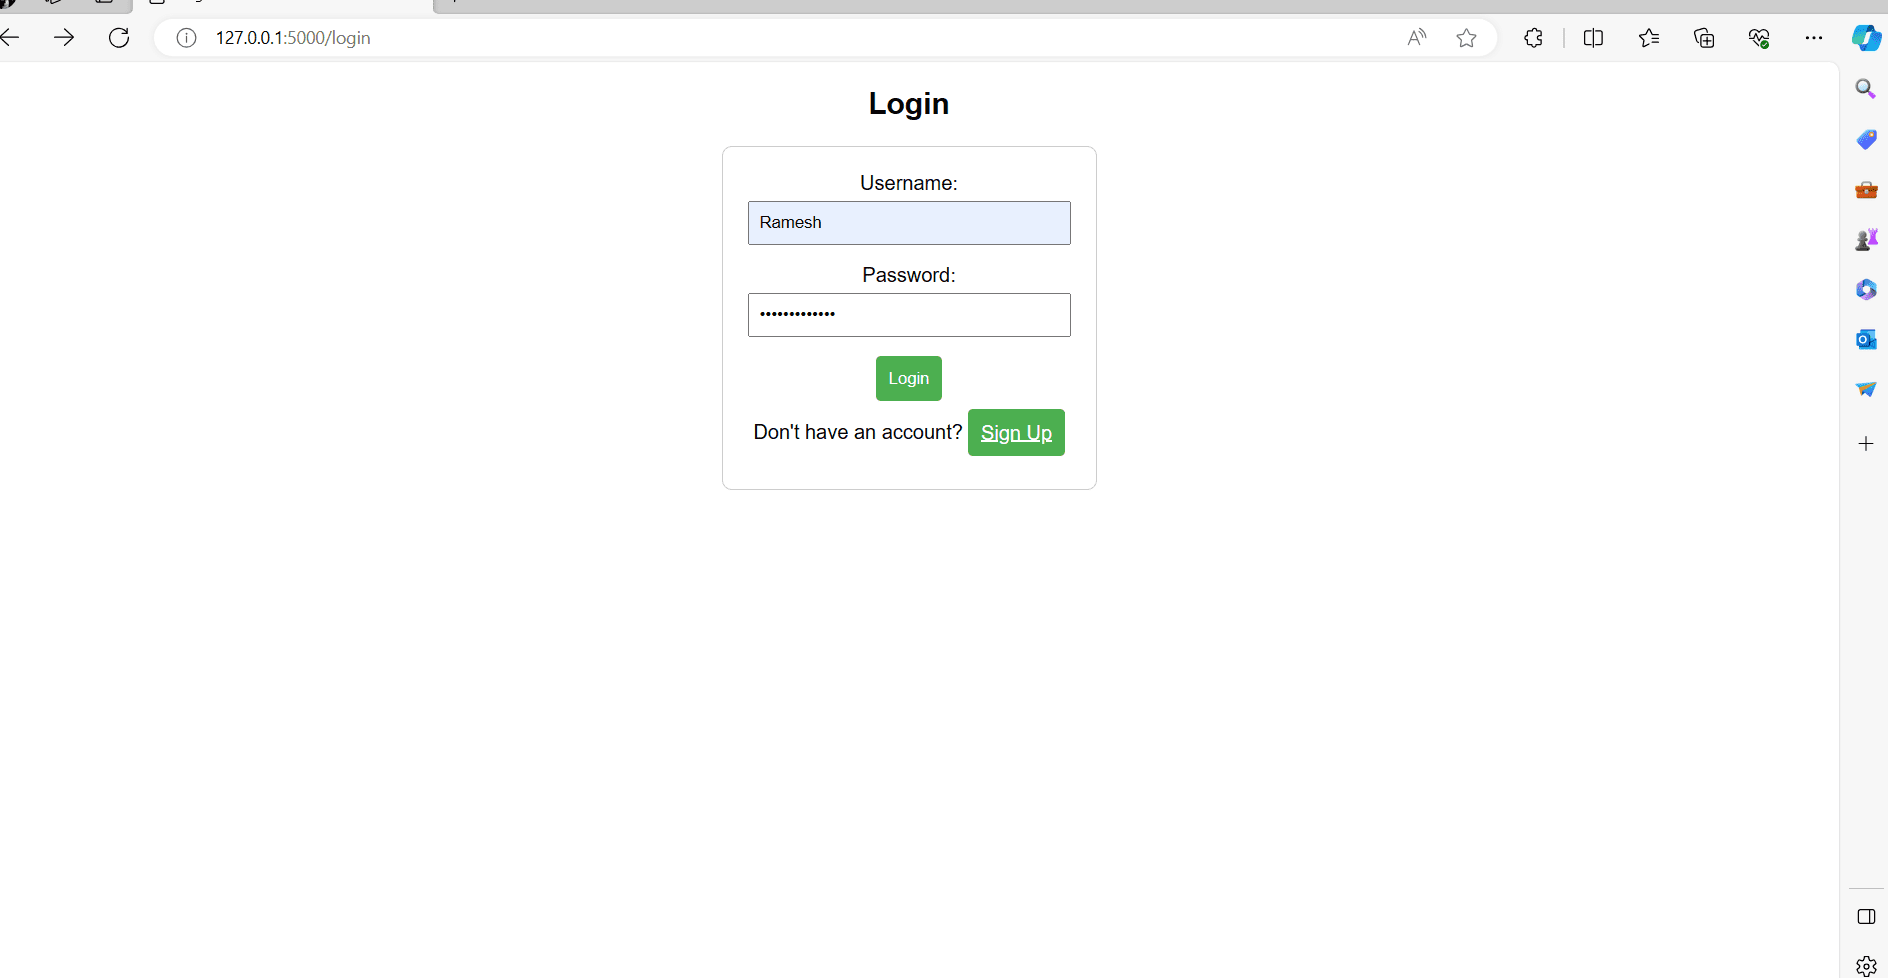

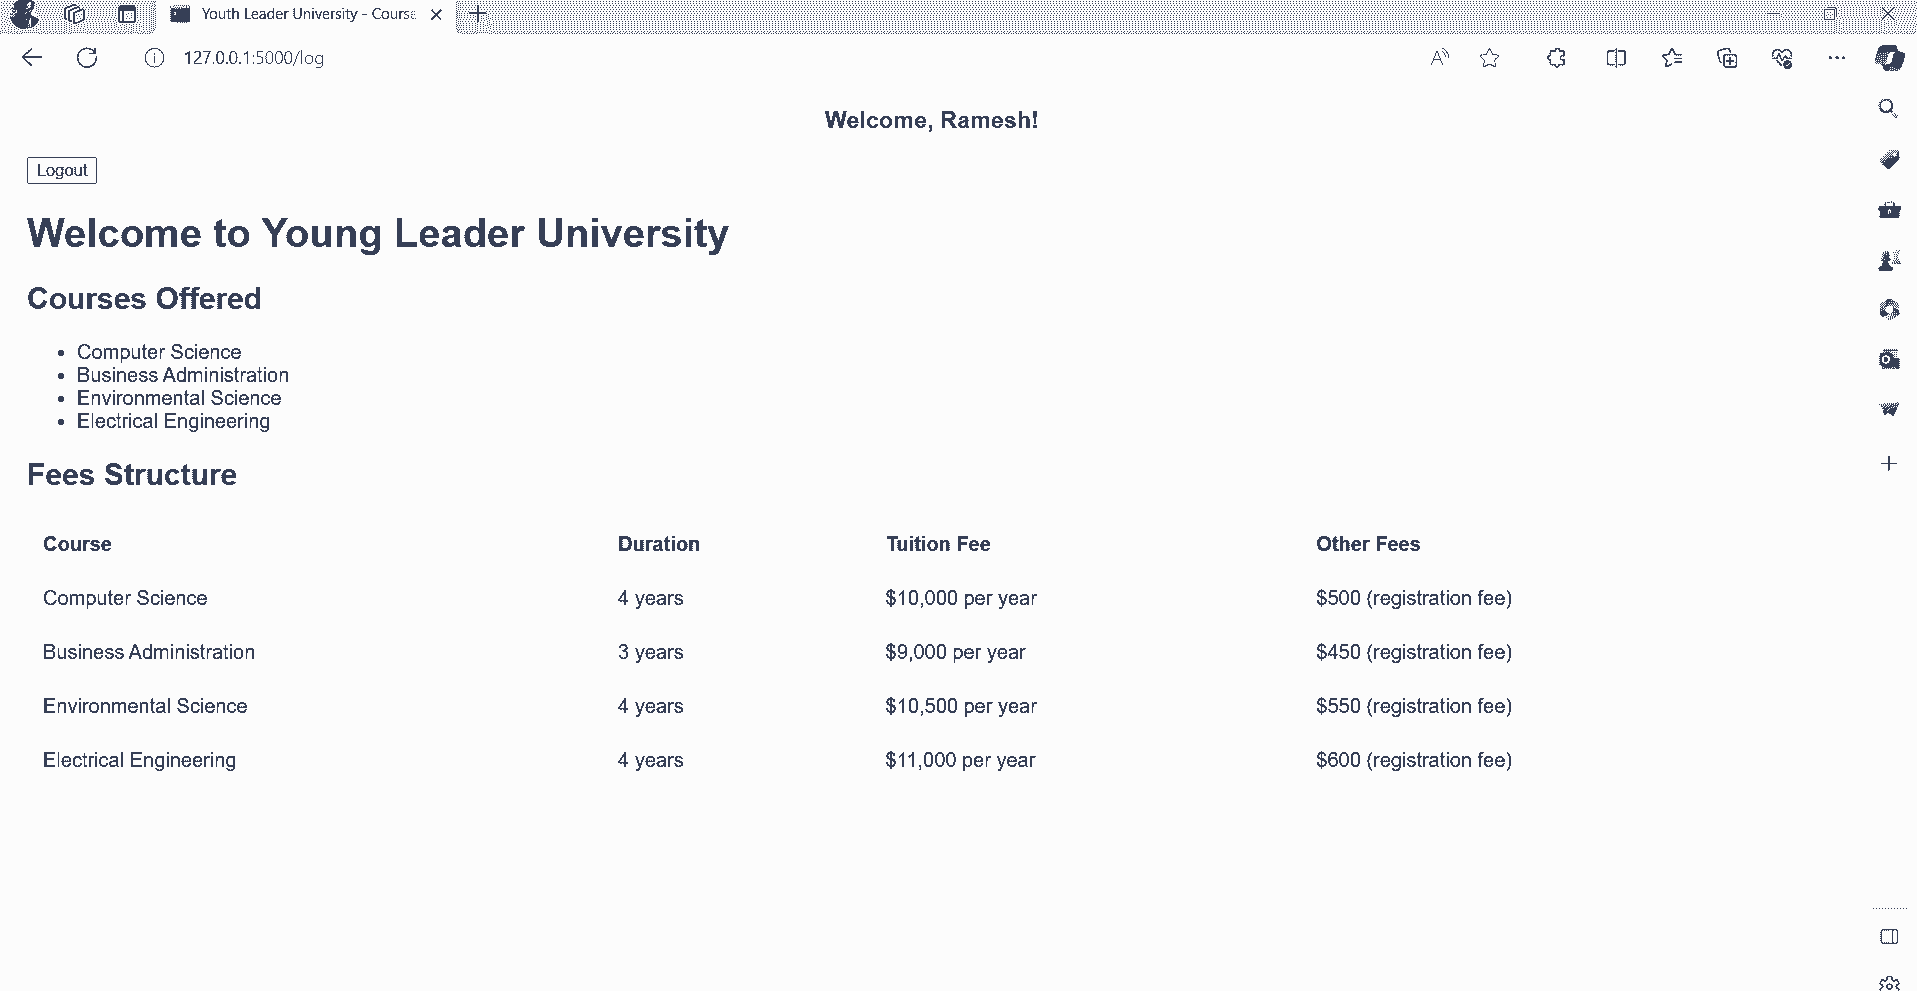

In [ ]:
#43.Describe the process of connecting a Flask app to a SQLite database using SQLAlchemy.
'''Connecting a Flask application to a SQLite database using SQLAlchemy involves several steps.
SQLAlchemy is a popular SQL toolkit and Object-Relational Mapping (ORM) library for Python, which makes database interactions easier and more Pythonic.
Here’s a detailed guide on how to achieve this:
1 Set Up Flask and SQLAlchemy
First, ensure you have Flask and SQLAlchemy installed. You can install them using pip:
pip install Flask SQLAlchemy

2. Create the Flask Application
Create a new directory for your Flask application and navigate into it. Inside this directory, create a Python file, e.g., app.py.

3. Set Up SQLAlchemy in Flask
In your app.py file, set up the Flask application and configure SQLAlchemy to connect to a SQLite database.
'''
from flask import Flask
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__)

# Set up the database URI
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///test.db'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False

# Initialize the SQLAlchemy object
db = SQLAlchemy(app)

# Define a model
class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(80), unique=True, nullable=False)
    email = db.Column(db.String(120), unique=True, nullable=False)

    def __repr__(self):
        return f'<User {self.username}>'

# Create the database and tables
with app.app_context():
    db.create_all()

@app.route('/')
def index():
    return "Hello, World!"

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
#44.How would you create a RESTful API endpoint in Flask that returns JSON data?
from flask import Flask, jsonify, request

app = Flask(__name__)

# Sample data
data = {
    "students": [
        {"id": 1, "name": "John Doe", "age": 21},
        {"id": 2, "name": "Jane Doe", "age": 22},
        {"id": 3, "name": "Jim Beam", "age": 23},
    ]
}

@app.route('/api/students', methods=['GET'])
def get_students():
    return jsonify(data)

@app.route('/api/students', methods=['POST'])
def add_student():
    new_student = request.get_json()
    data['students'].append(new_student)
    return jsonify({"message": "Student added successfully!"}), 201

if __name__ == '__main__':
    app.run(debug=True)



In [ ]:
#45.Explain how to use Flask-WTF to create and validate forms in a Flask application.
'''Flask-WTF is an extension for Flask that integrates WTForms, a flexible form validation and rendering library.
Flask-WTF simplifies form handling and validation in Flask applications.
html file :
 <!-- templates/register.html -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>{{ title }}</title>
</head>
<body>
    <h1>Register</h1>
    <form method="POST" action="{{ url_for('register') }}">
        {{ form.hidden_tag() }}
        <div>
            {{ form.username.label }}<br>
            {{ form.username(size=32) }}<br>
            {% for error in form.username.errors %}
                <span style="color: red;">[{{ error }}]</span><br>
            {% endfor %}
        </div>
        <div>
            {{ form.email.label }}<br>
            {{ form.email(size=32) }}<br>
            {% for error in form.email.errors %}
                <span style="color: red;">[{{ error }}]</span><br>
            {% endfor %}
        </div>
        <div>
            {{ form.password.label }}<br>
            {{ form.password(size=32) }}<br>
            {% for error in form.password.errors %}
                <span style="color: red;">[{{ error }}]</span><br>
            {% endfor %}
        </div>
        <div>
            {{ form.confirm_password.label }}<br>
            {{ form.confirm_password(size=32) }}<br>
            {% for error in form.confirm_password.errors %}
                <span style="color: red;">[{{ error }}]</span><br>
            {% endfor %}
        </div>
        <div>
            {{ form.submit() }}
        </div>
    </form>
    <a href="{{ url_for('home') }}">Back to Home</a>
</body>
</html>

Explanation of Code
Flask and Flask-WTF Imports: Import the necessary modules from Flask and Flask-WTF.
Flask App Initialization: Create an instance of the Flask class and configure the secret key.
Form Class Definition: Define a RegistrationForm class that inherits from FlaskForm. This class includes form fields (username, email, password, confirm_password) with appropriate validators.
Route for Form Handling: Define a route (/register) that handles GET and POST requests. If the form is submitted and validated successfully, flash a success message and redirect to the home page. Otherwise, render the form template.
HTML Template: Create an HTML template to render the form. Use {{ form.hidden_tag() }} to include hidden tags needed for CSRF protection. Display form fields and validation errors.
'''
from flask import Flask, render_template, redirect, url_for, flash
from flask_wtf import FlaskForm
from wtforms import StringField, PasswordField, SubmitField
from wtforms.validators import DataRequired, Email, EqualTo

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'  # Replace with a random secret key

# Define the form class
class RegistrationForm(FlaskForm):
    username = StringField('Username', validators=[DataRequired()])
    email = StringField('Email', validators=[DataRequired(), Email()])
    password = PasswordField('Password', validators=[DataRequired()])
    confirm_password = PasswordField('Confirm Password', validators=[DataRequired(), EqualTo('password')])
    submit = SubmitField('Sign Up')

@app.route('/register', methods=['GET', 'POST'])
def register():
    form = RegistrationForm()
    if form.validate_on_submit():
        flash(f'Account created for {form.username.data}!', 'success')
        return redirect(url_for('home'))
    return render_template('register.html', title='Register', form=form)

@app.route('/')
@app.route('/home')
def home():
    return "Home Page"

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
#46.How can you implement file uploads in a Flask application?
#pip install Flask Flask-WTF ---> install first
from flask import Flask, request, render_template, session, send_from_directory
from werkzeug.utils import secure_filename
import os

app = Flask(__name__)
app.secret_key = 'qwerty'

UPLOAD_FOLDER = 'uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# Ensure the upload folder exists
os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)

@app.route('/')
def upload():
    return render_template('upload.html')

@app.route('/disp', methods=['GET', 'POST'])
def disp():
    # Check if the 'file' key is in the request.files dictionary
    if 'file' not in request.files:
        return render_template('upload.html')

    file = request.files['file']
    if file.filename == '':
        return render_template('upload.html')

    # Save the uploaded file to the 'uploads' folder
    filename = secure_filename(file.filename)
    filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
    file.save(filepath)

    session["filename"] = filename

    # Display the uploaded image on the screen
    return render_template('disp.html', filename=filename)

# Serve uploaded files directly
@app.route('/uploads/<filename>')
def uploaded_file(filename):
    return send_from_directory(app.config['UPLOAD_FOLDER'], filename)

if __name__ == '__main__':
    app.run(debug=True)

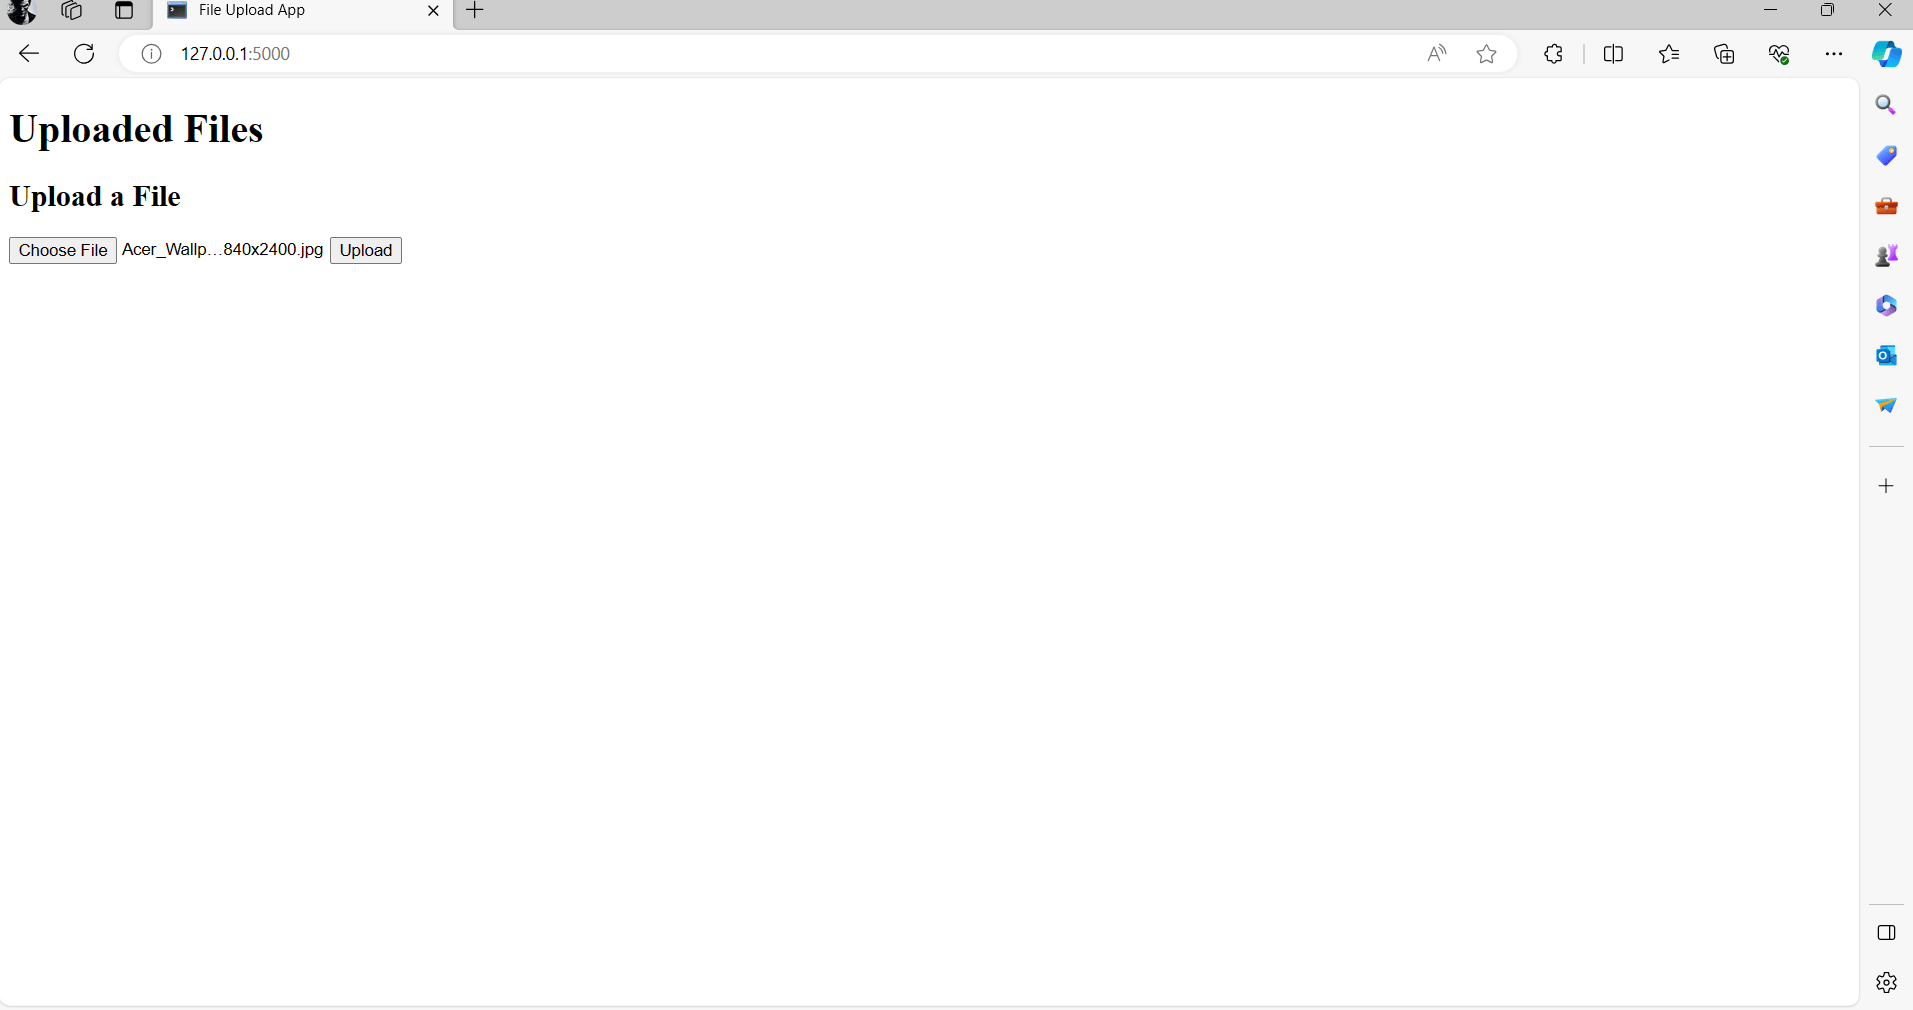

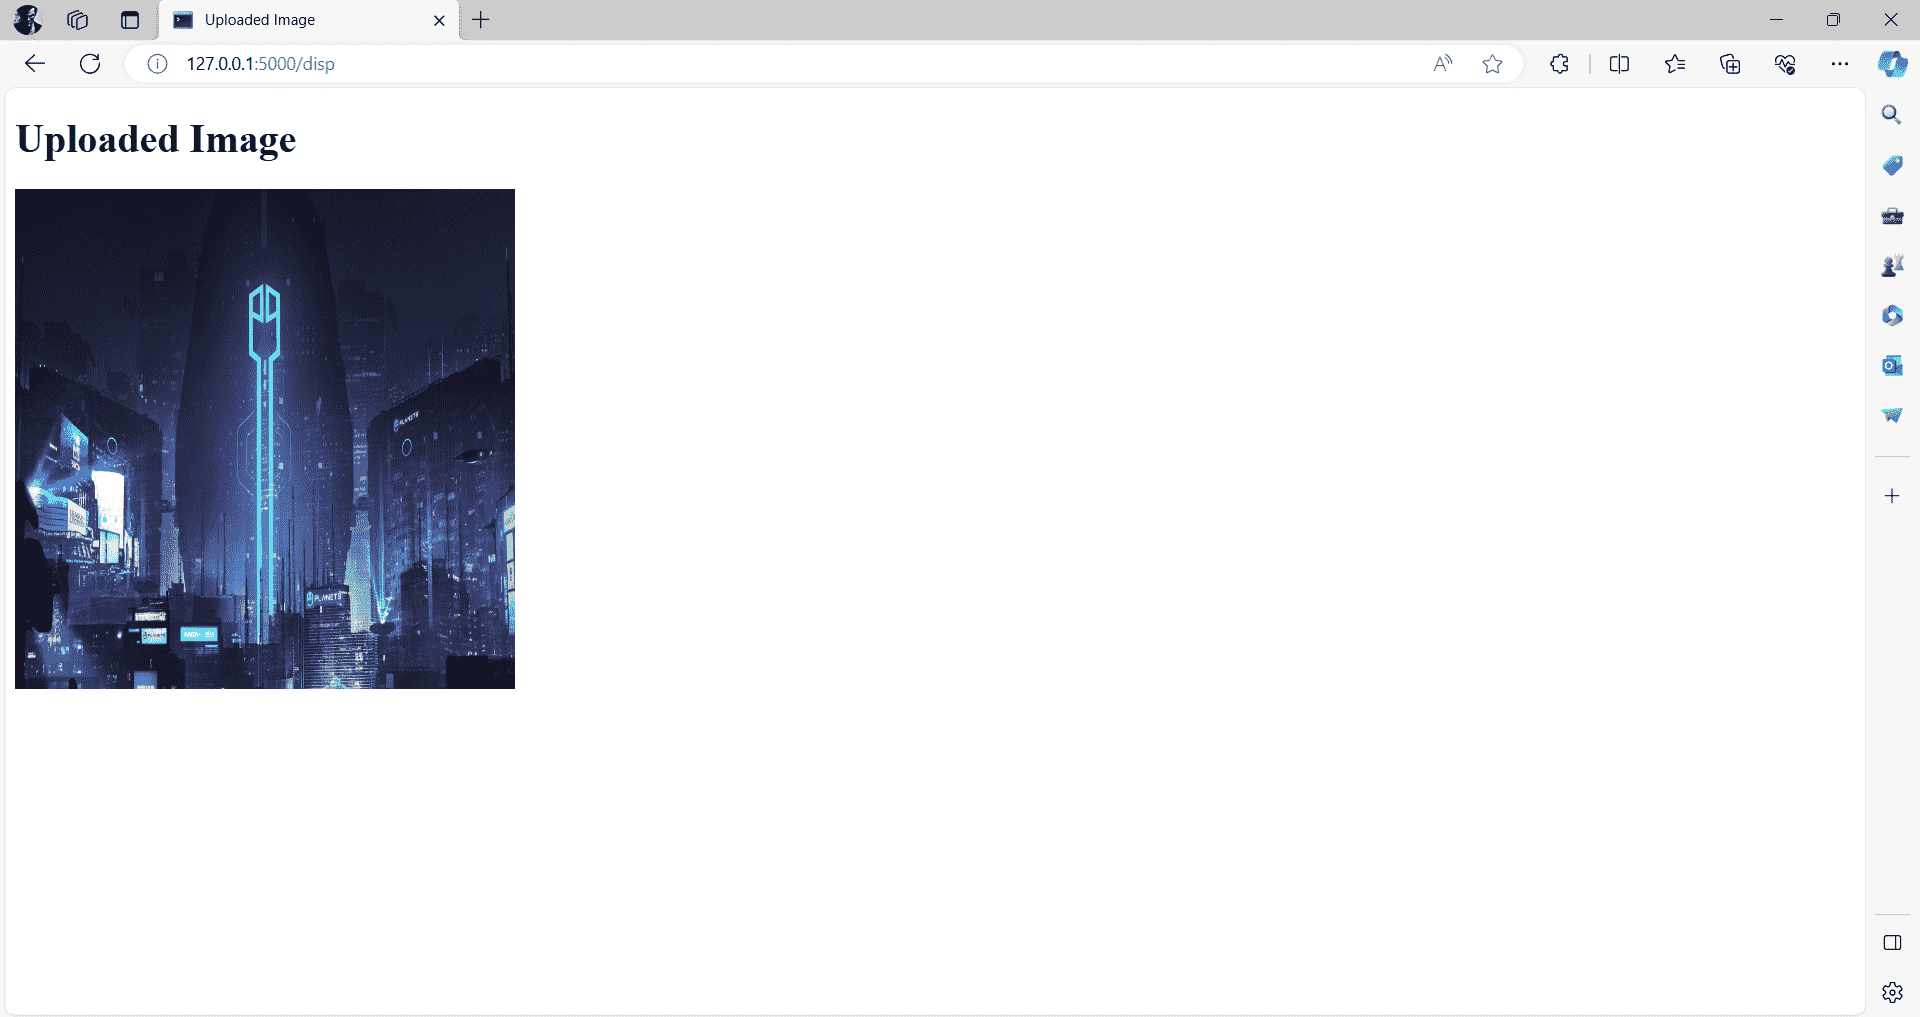

In [ ]:
#47.Describe the steps to create a Flask blueprint and why you might use one.
'''In Flask, blueprints provide a way to organize and modularize your application. They allow you to split your application into smaller components, each with its own set of routes,
 templates, and static files. This makes it easier to manage large applications and helps with code organization and reuse.
Here’s a detailed guide on how to create and use a Flask blueprint:
Steps to Create a Flask Blueprint
Organize Your Project Structure

Create a directory structure that reflects the modular nature of your application. For example:
1.Organize Your Project Structure
/my_flask_app
├── app.py
├── /blueprints
│   ├── __init__.py
│   └── example.py
└── /templates

Here, /blueprints is a directory where you will define your blueprints.

2. Define a Blueprint

In the example.py file inside the /blueprints directory, define a blueprint:
'''
# blueprints/example.py
from flask import Blueprint, render_template, request, redirect, url_for, flash

# Create a Blueprint instance
example_bp = Blueprint('example', __name__, template_folder='templates')

@example_bp.route('/hello')
def hello():
    return "Hello from the blueprint!"

@example_bp.route('/form', methods=['GET', 'POST'])
def form():
    if request.method == 'POST':
        name = request.form.get('name')
        flash(f'Form submitted with name: {name}', 'success')
        return redirect(url_for('example.hello'))
    return render_template('form.html')


'''Blueprint Creation: The Blueprint class is used to create a new blueprint. You specify a name for the blueprint and the import name (typically __name__).
Route Definition: Define routes just as you would in the main application.
Template Folder: Optionally, you can specify a template_folder if your blueprint has its own set of templates.
Register the Blueprint

In your main application file (app.py), register the blueprint with the Flask app:

'''
# app.py
from flask import Flask
from blueprints.example import example_bp

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'  # For flash messages

# Register the blueprint
app.register_blueprint(example_bp, url_prefix='/example')

@app.route('/')
def home():
    return "Home Page"

if __name__ == '__main__':
    app.run(debug=True)
'''
Blueprint Registration: Use app.register_blueprint() to register the blueprint with the Flask app. The url_prefix argument is optional and specifies a prefix for all routes defined in the blueprint.
4. Create Templates

If your blueprint uses templates, create them inside the blueprint’s templates directory. For example, create form.html in blueprints/templates:

html
<!-- blueprints/templates/form.html -->
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Form</title>
</head>
<body>
    <h1>Form</h1>
    <form method="POST">
        <label for="name">Name:</label>
        <input type="text" id="name" name="name">
        <button type="submit">Submit</button>
    </form>
</body>
</html>
Why Use Blueprints?

Modularity: Blueprints help you organize your code by splitting it into separate components, making it easier to manage and maintain.

Reusability: You can create reusable components that can be used across different Flask applications.

Separation of Concerns: Blueprints allow you to separate different parts of your application, such as user authentication, blog posts, or admin functionality, into distinct modules.

Collaboration: Blueprints make it easier to collaborate with others on large projects by dividing the work into smaller, more manageable pieces.

Scalability: As your application grows, blueprints help you scale by keeping related routes, templates, and static files together.
'''



In [ ]:
#48.How would you deploy a Flask application to a production server using Gunicorn and Nginx?
'''Deploying a Flask application to a production server using Gunicorn and Nginx involves several steps. Gunicorn is a Python WSGI HTTP server that serves your Flask application, while Nginx is a web server that acts as a reverse proxy to handle requests and manage static files. Here’s a step-by-step guide:

1. Prepare Your Flask Application
Ensure your Flask application is ready for deployment. You should have:

Your Flask application in a file, e.g., app.py.
A requirements.txt file with all the dependencies listed.
2. Set Up the Server
Assuming you are using a Unix-based server (like Ubuntu), follow these steps:

Connect to Your Server

Connect to your server via SSH:
ssh your_user@your_server_ip

Update and Install Dependencies

Update the package list and install required packages:

bash
sudo apt update
sudo apt install python3-pip python3-venv nginx

Set Up Your Flask Application

Create a directory for your Flask application:

bash
mkdir ~/my_flask_app
cd ~/my_flask_app

Upload your Flask application files and requirements.txt to this directory. For simplicity, you can use scp or rsync to transfer files.
Upload your Flask application files and requirements.txt to this directory. For simplicity, you can use scp or rsync to transfer files.

Create a Virtual Environment

Create and activate a virtual environment:

bash
python3 -m venv venv
source venv/bin/activate
Install Dependencies

Install the required Python packages:

bash
pip install -r requirements.txt
Install Gunicorn

Install Gunicorn in the virtual environment:

bash
pip install gunicorn
3. Configure Gunicorn
Run Gunicorn to serve your Flask application. You can test it with:

bash
gunicorn --workers 3 --bind 0.0.0.0:8000 app:app
--workers 3: Number of worker processes (adjust based on your server’s CPU cores).
--bind 0.0.0.0:8000: Bind to all IP addresses on port 8000.
app:app: Refers to your Flask application instance (assuming app is the Flask instance in app.py).


4. Set Up Nginx as a Reverse Proxy
Create a New Nginx Configuration File

Create a new configuration file for your Flask application:

bash
sudo nano /etc/nginx/sites-available/my_flask_app
Add the following configuration:

nginx
server {
    listen 80;
    server_name your_domain_or_ip;

    location / {
        proxy_pass http://127.0.0.1:8000;
        proxy_set_header Host $host;
        proxy_set_header X-Real-IP $remote_addr;
        proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
        proxy_set_header X-Forwarded-Proto $scheme;
    }

    location /static/ {
        alias /path/to/your/static/files/;
    }
}
Replace your_domain_or_ip with your server’s domain or IP address.
Adjust the /path/to/your/static/files/ to the actual path where your static files are located.
Enable the Configuration

Create a symbolic link to enable the configuration:

bash
sudo ln -s /etc/nginx/sites-available/my_flask_app /etc/nginx/sites-enabled
Test the Nginx Configuration

Test the configuration for syntax errors:

bash
sudo nginx -t
If the test is successful, reload Nginx:

bash
sudo systemctl reload nginx
5. Set Up Gunicorn as a Systemd Service
Create a systemd service file to manage Gunicorn:

bash
sudo nano /etc/systemd/system/my_flask_app.service
Add the following content:

ini
[Unit]
Description=Gunicorn instance to serve my_flask_app
After=network.target

[Service]
User=your_user
Group=www-data
WorkingDirectory=/home/your_user/my_flask_app
Environment="PATH=/home/your_user/my_flask_app/venv/bin"
ExecStart=/home/your_user/my_flask_app/venv/bin/gunicorn --workers 3 --bind 127.0.0.1:8000 app:app

[Install]
WantedBy=multi-user.target
Replace your_user with your username.
Adjust WorkingDirectory and ExecStart paths to match your setup.
Enable and start the Gunicorn service:

bash
sudo systemctl start my_flask_app
sudo systemctl enable my_flask_app
6. Verify Deployment
Check if Gunicorn is Running

Check the status of the Gunicorn service:

bash
sudo systemctl status my_flask_app
Access Your Application

Open your web browser and navigate to your domain or IP address to see if the Flask application is running.

Additional Considerations
Security: Configure a firewall to allow traffic on port 80 (HTTP) and 443 (HTTPS). Consider using Let’s Encrypt for SSL certificates to enable HTTPS.
Logging: Configure logging for both Gunicorn and Nginx to monitor your application.
Performance Tuning: Adjust the number of Gunicorn workers based on your server’s CPU and memory resources.
By following these steps, you will have a Flask application running in a production environment with Gunicorn serving your app and Nginx handling incoming requests and static files.'''


In [ ]:
#4949. Make a fully functional web application using flask, Mangodb. Signup,Signin page.And after successfully
#login .Say hello Geeks message at webpage.
'''Install MongoDB

Follow the MongoDB installation guide for your operating system: MongoDB Installation

Start MongoDB

Start the MongoDB server:

bash
sudo systemctl start mongod
Create a Database and Collection

Connect to MongoDB using the MongoDB shell or a GUI tool like MongoDB Compass and create a database and collection:

bash
use myapp
db.createCollection("users")


signup.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Signup</title>
</head>
<body>
    <h1>Signup</h1>
    <form method="POST">
        <label for="username">Username:</label>
        <input type="text" id="username" name="username" required><br>
        <label for="password">Password:</label>
        <input type="password" id="password" name="password" required><br>
        <button type="submit">Signup</button>
    </form>
    <a href="{{ url_for('login') }}">Already have an account? Login here</a>
</body>
</html>


login.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login</title>
</head>
<body>
    <h1>Login</h1>
    <form method="POST">
        <label for="username">Username:</label>
        <input type="text" id="username" name="username" required><br>
        <label for="password">Password:</label>
        <input type="password" id="password" name="password" required><br>
        <button type="submit">Login</button>
    </form>
    <a href="{{ url_for('signup') }}">Don't have an account? Signup here</a>
</body>
</html>

'''
# app.py
from flask import Flask, render_template, request, redirect, url_for, flash, session
from flask_pymongo import PyMongo
from werkzeug.security import generate_password_hash, check_password_hash

app = Flask(__name__)
app.config['SECRET_KEY'] = 'your_secret_key_here'
app.config['MONGO_URI'] = 'mongodb://localhost:27017/myapp'

mongo = PyMongo(app)

@app.route('/home')
def home():
    if 'username' in session:
        return f"Hello {session['username']}! Welcome to Geeks."
    return redirect(url_for('login'))

@app.route('/signup', methods=['GET', 'POST'])
def signup():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']

        hashed_password = generate_password_hash(password, method='sha256')
        mongo.db.users.insert_one({'username': username, 'password': hashed_password})
        flash('Signup successful! Please login.', 'success')
        return redirect(url_for('login'))

    return render_template('signup.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']

        user = mongo.db.users.find_one({'username': username})
        if user and check_password_hash(user['password'], password):
            session['username'] = username
            return redirect(url_for('home'))
        flash('Invalid credentials. Please try again.', 'danger')

    return render_template('login.html')

@app.route('/logout')
def logout():
    session.pop('username', None)
    flash('You have been logged out.', 'info')
    return redirect(url_for('login'))

if __name__ == '__main__':
    app.run(debug=True)


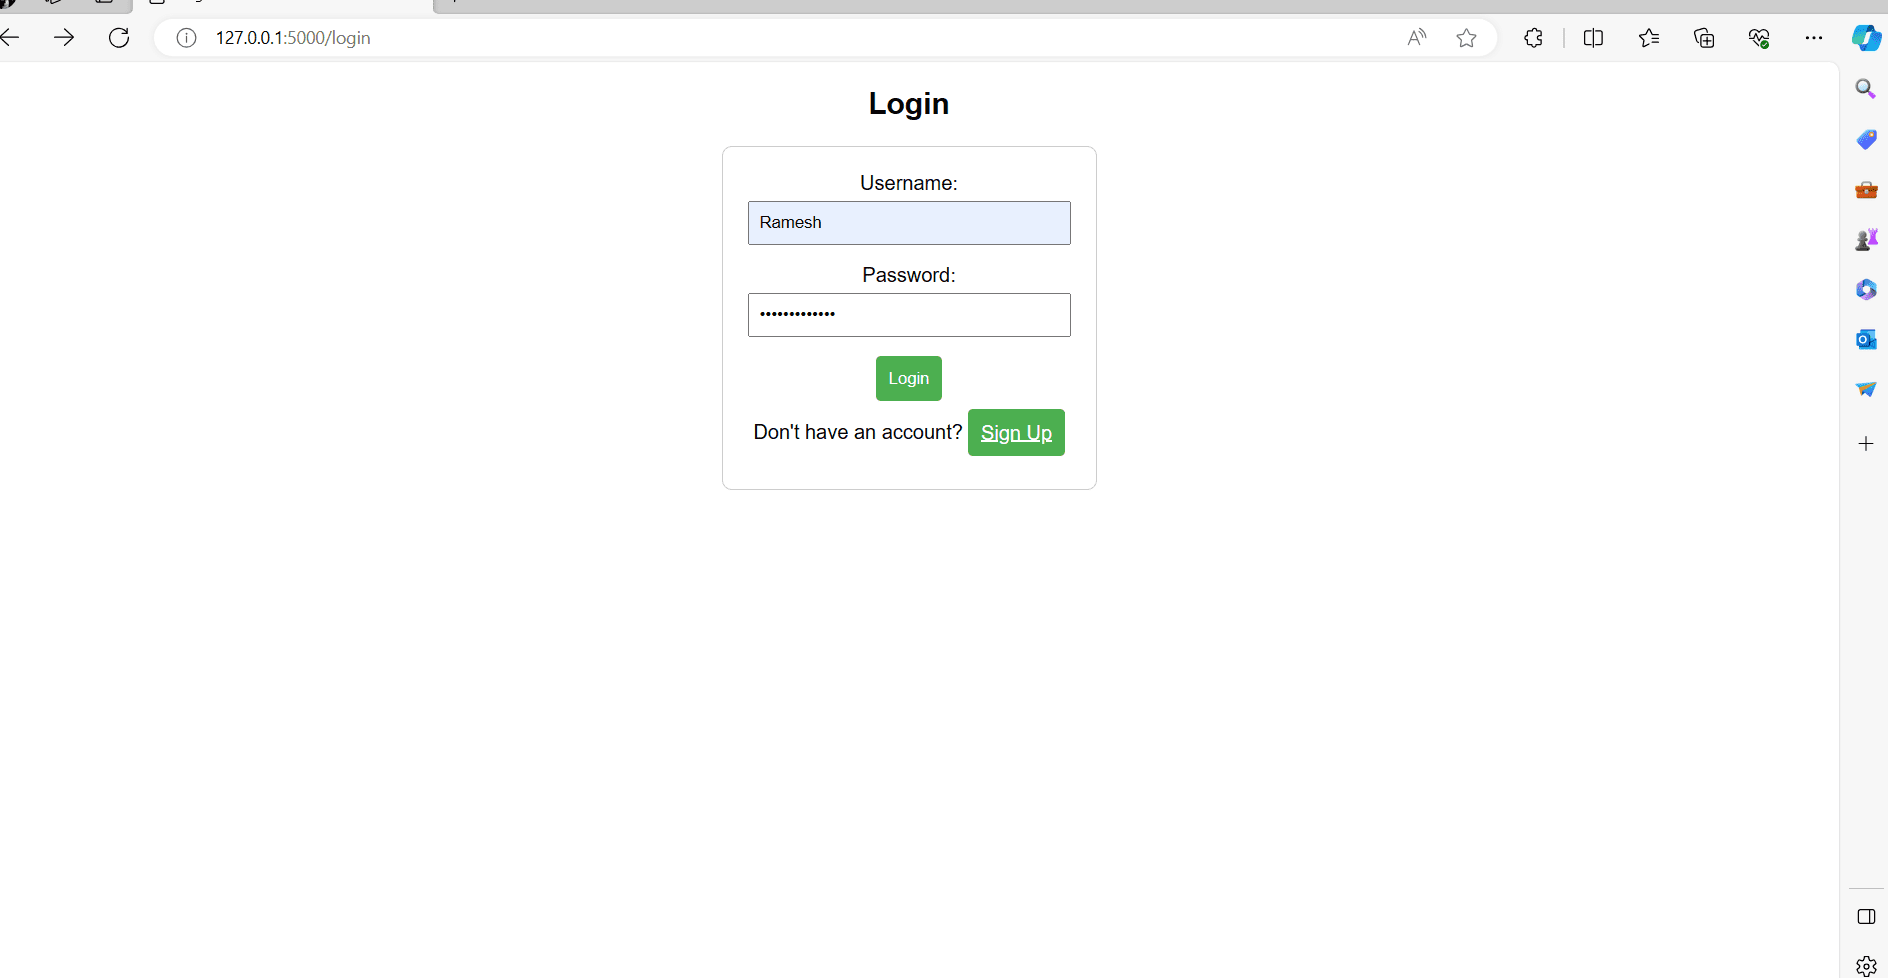

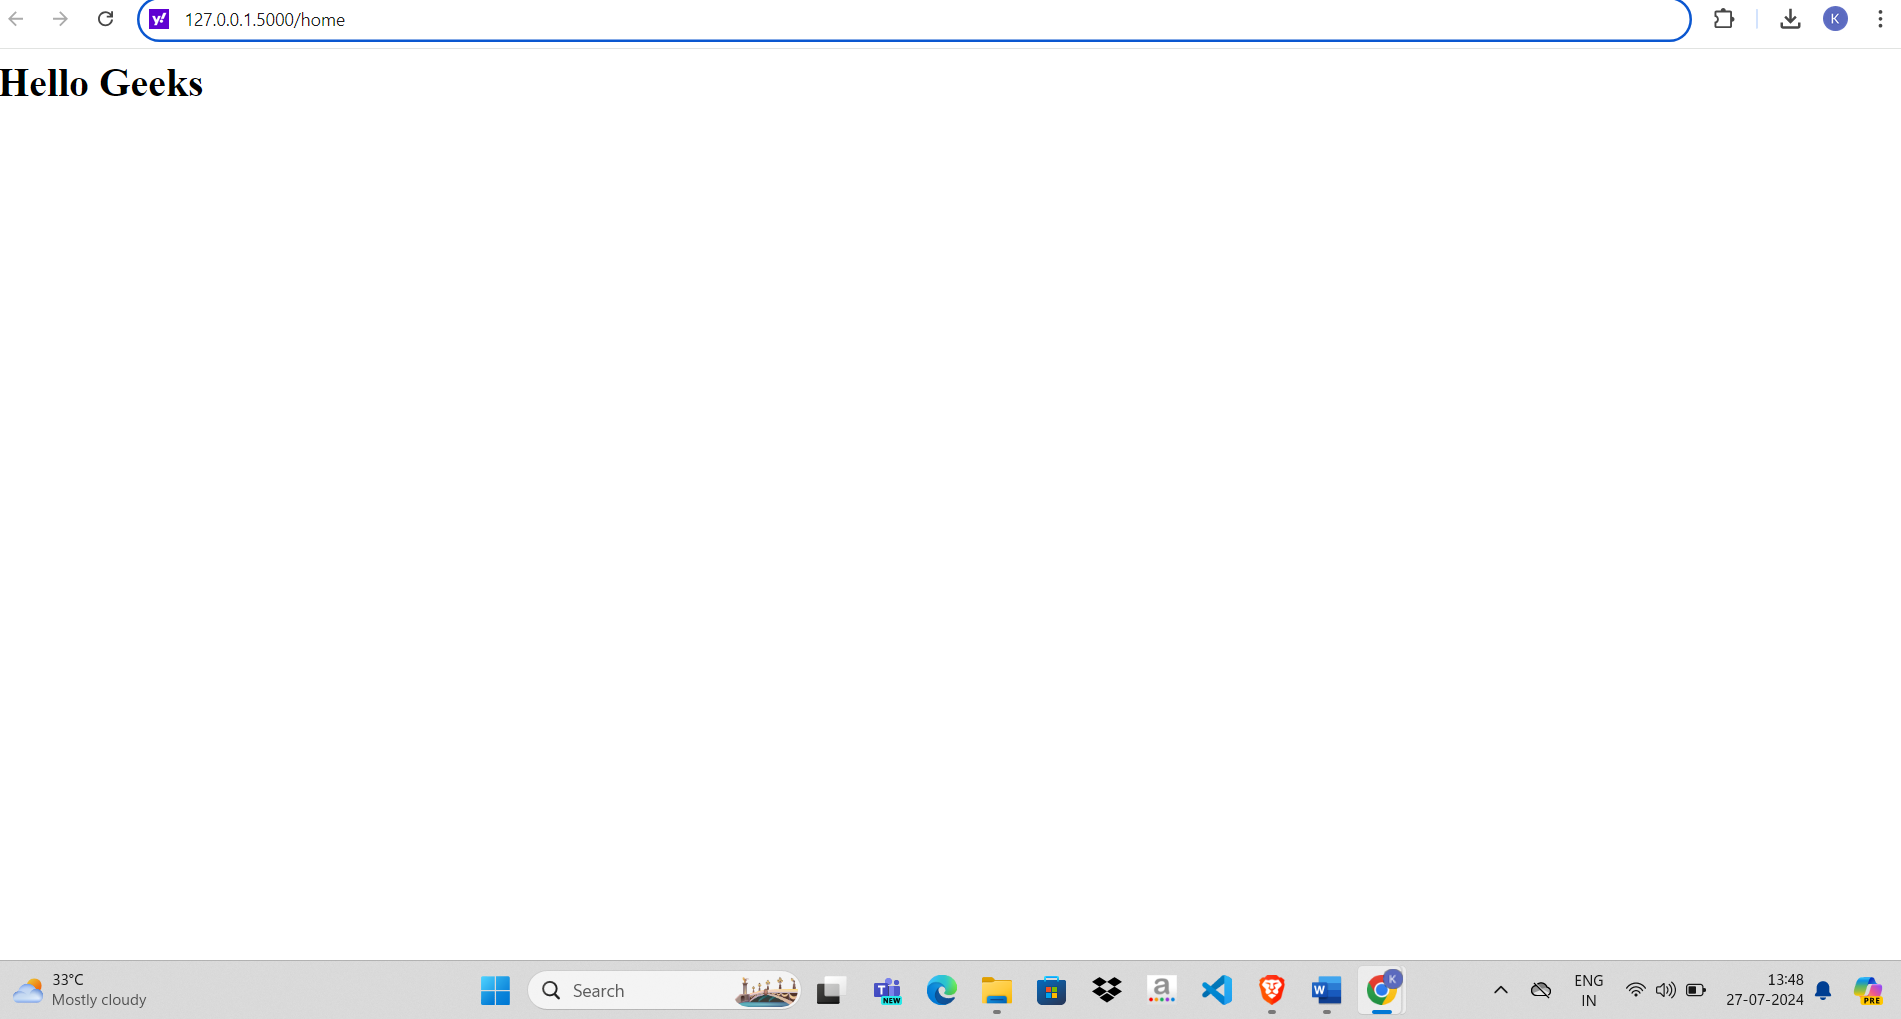